# Unit 1 Data Mining Project

You will be loading a dataset from Kansas City House Prices.
Knock your self out with what you've learnt.
The dataset is called "kc_house_data.csv"

In [64]:
# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats
import seaborn as sns 

In [65]:
# read in the dataset and get columns name 
df = pd.read_csv('kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Select some columns you may think are useful for example `['price','bedrooms','bathrooms','sqft_living','yr_built']`

In [66]:
# create new data frame by selecting some columns from original data set
df = df[['price','bedrooms','bathrooms','sqft_living','yr_built']]

# and obtain a summary of the new data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [67]:
# get statistics and value counts to find outliers and potential bad data in the new data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
yr_built,21613.0,1971.005136,29.373411,1900.0,1951.00,1975.00,1997.0,2015.0


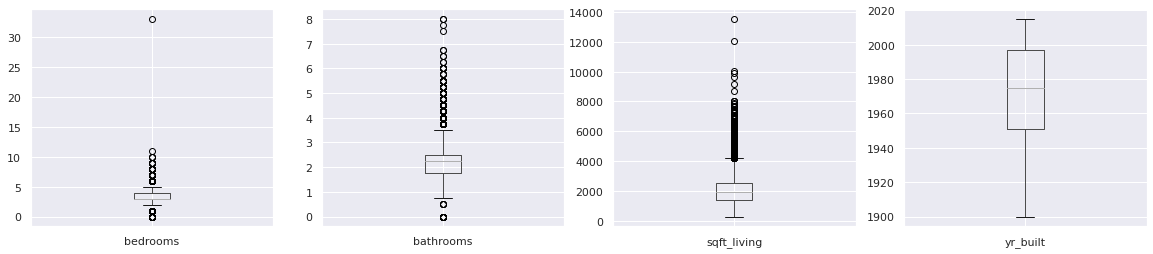

In [68]:
fig, ax=plt.subplots(1, 4, figsize=(20, 4))

df.boxplot(column=["bedrooms"], ax=ax[0])
df.boxplot(column=["bathrooms"], ax=ax[1])
df.boxplot(column=["sqft_living"],ax=ax[2])
df.boxplot(column=["yr_built"], ax=ax[3])


In [69]:
# cleaning data by dropping rows for what the number of 'bedrooms' is equal to zero, considered as bad data
df = df[df.bedrooms != 0 ]
# cleaning data by dropping the row for what number of 'bedrooms' is below to '33', considered as potential oulier
df = df[df.bedrooms < 33 ]
# cleaning data by dropping rows for what the number of 'bathrooms' is equal to zero, considered as bad data
df = df[df.bathrooms != 0 ]
# cleaning data by dropping the row for what number of 'bathrooms' is below to '7', considered as potential oulier
df = df[df.bathrooms < 7 ]
# obtain a new summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21592 non-null  float64
 1   bedrooms     21592 non-null  int64  
 2   bathrooms    21592 non-null  float64
 3   sqft_living  21592 non-null  int64  
 4   yr_built     21592 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1012.1 KB


In [70]:
# get statistics and value counts to find outliers and potential bad data in the new data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21592.0,539496.455076,361162.147652,78000.0,322000.00,450000.00,645000.0,7062500.00
bedrooms,21592.0,3.371156,0.902694,1.0,3.00,3.00,4.0,11.00
bathrooms,21592.0,2.114788,0.765145,0.5,1.75,2.25,2.5,6.75
sqft_living,21592.0,2078.897786,910.720493,370.0,1430.00,1910.00,2550.0,10040.00
yr_built,21592.0,1970.999768,29.373428,1900.0,1951.00,1975.00,1997.0,2015.00


In [71]:
# visually inspect the first five rows of the new data frame
df.head(10)

,price,bedrooms,bathrooms,sqft_living,yr_built
0,221900.0,3,1.00,1180,1955
1,538000.0,3,2.25,2570,1951
2,180000.0,2,1.00,770,1933
3,604000.0,4,3.00,1960,1965
4,510000.0,3,2.00,1680,1987
5,1225000.0,4,4.50,5420,2001
6,257500.0,3,2.25,1715,1995
7,291850.0,3,1.50,1060,1963
8,229500.0,3,1.00,1780,1960
9,323000.0,3,2.50,1890,2003


Text(0.5, 1.0, 'Year Built')

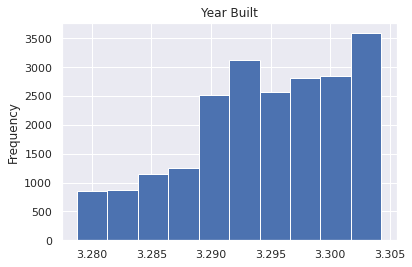

In [72]:
# draw a histogram plot based on' year built' of the new data frame
fig, ax = plt.subplots()

df_log = np.log10(df.yr_built)

df_log.plot.hist(grid=True)

ax.set_title("Year Built")

Text(0.5, 1.0, 'Price')

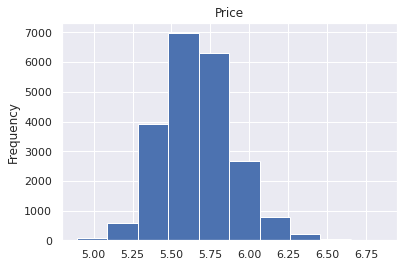

In [73]:
# Price
fig, ax = plt.subplots()

df_log = np.log10(df.price)

df_log.plot.hist(grid=True)

ax.set_title("Price")


In [74]:
df_Temp = pd.read_csv('kc_house_data.csv')
df_Temp.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'Without outliers')

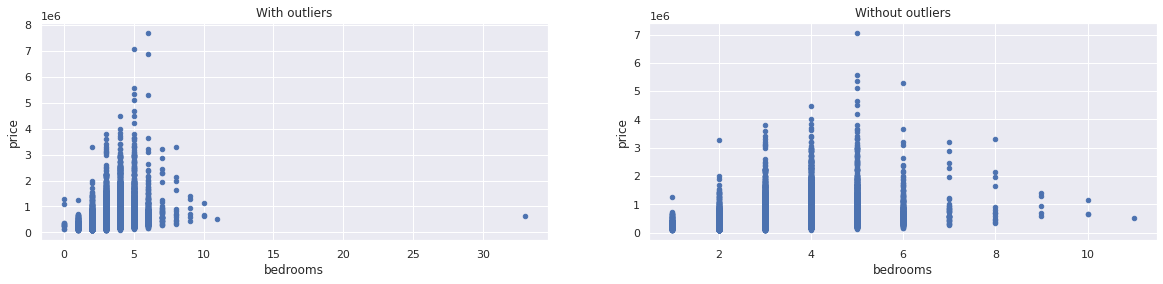

In [75]:
# draw a scatter plot for each data frame based on 'number of bedrooms' to see the difference
fig, ax=plt.subplots(1, 2, figsize=(20, 4))

df_Temp.plot(kind='scatter', x='bedrooms', y='price', ax=ax[0])
ax[0].set_title("With outliers")

df.plot(kind='scatter', x='bedrooms', y='price',ax=ax[1])
ax[1].set_title("Without outliers")

Text(0.5, 1.0, 'Without outliers')

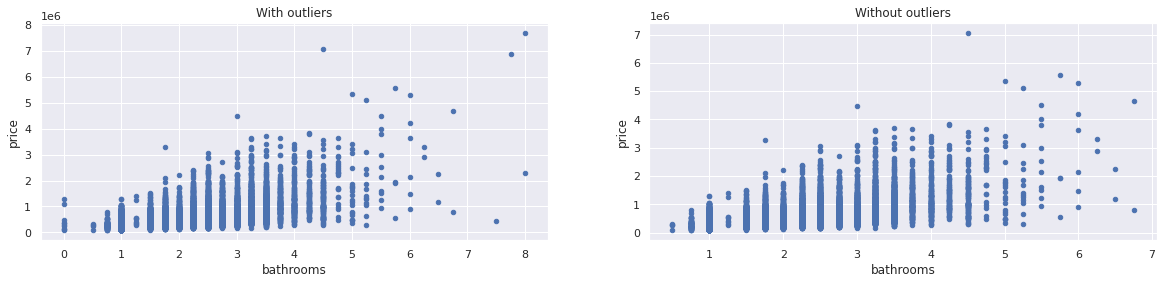

In [76]:
# draw a scatter plot for each data frame based on 'number of bathrooms' to see the difference
fig, ax=plt.subplots(1, 2, figsize=(20, 4))

df_Temp.plot(kind='scatter', x='bathrooms', y='price', ax=ax[0])
ax[0].set_title("With outliers")

df.plot(kind='scatter', x='bathrooms', y='price',ax=ax[1])
ax[1].set_title("Without outliers")

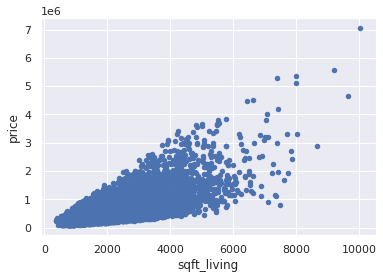

In [77]:
# draw a scatter plot based on 'square footage of the home' of the new data frame
df.plot(kind='scatter', x='sqft_living', y='price')

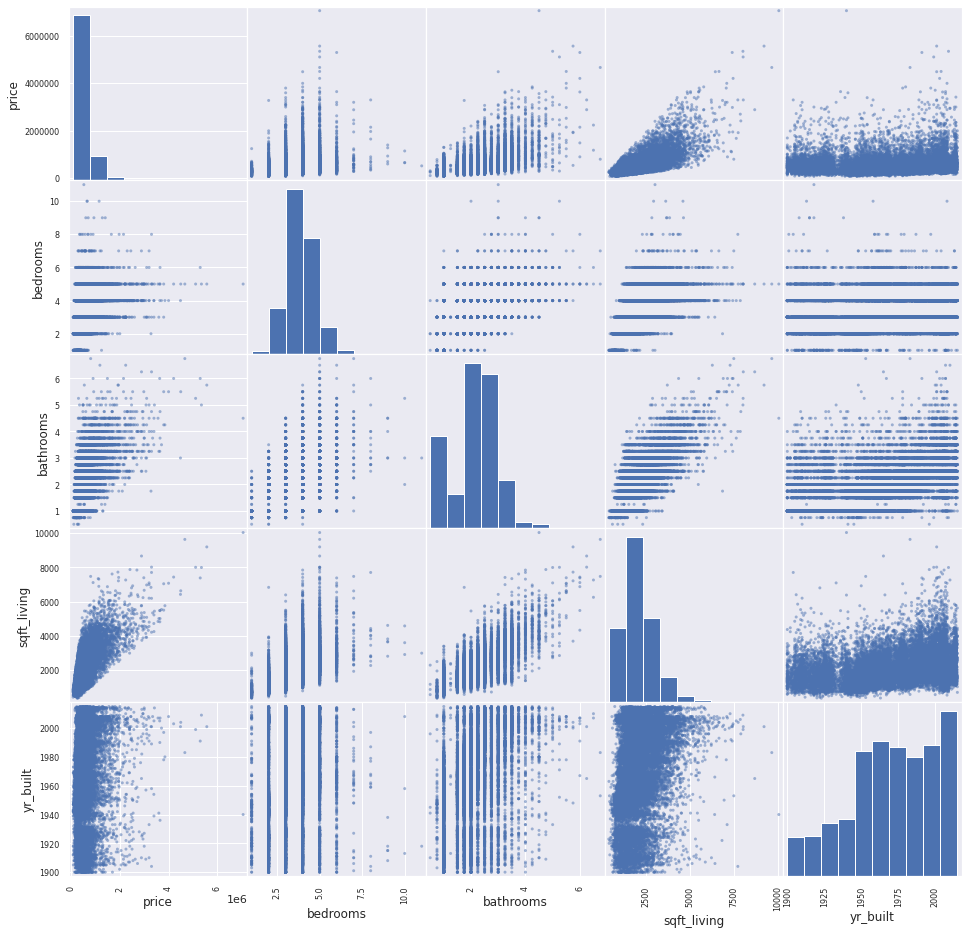

In [78]:
# draw a matrix of scatter plots of the data set in a shape of 16" width x 16" height
# to roughly determine if there is a linear correlation between multiple variables
pd.plotting.scatter_matrix(df, figsize=(16,16))
plt.show()

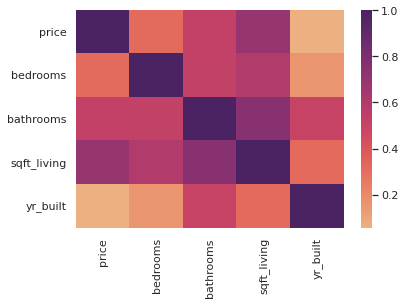

In [79]:
# Correlation and Heatmap
df_mtx = df.corr()
sns.heatmap(df_mtx, cmap="flare")

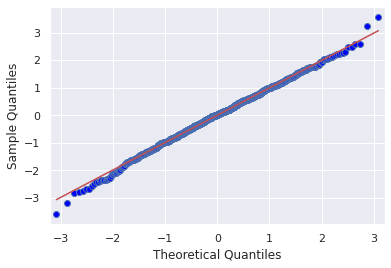

In [80]:
# include the QQ norm to see if residuals are normal
residuals = np.random.normal(0,1, 1000)

# using 's' to get scaled line by the standard deviation and mean added)
sm.qqplot(residuals, line='s')

pylab.show()

Extra points if you can figure this out.
Just google how to do an OLS in Python provide X and Y.
X is the target or the house price
Y is the features or columns being used to predict the house price or X. I recommended using `['bedrooms','bathrooms','sqft_living','yr_built']` but you can use whatever you think it might help. 

**What is the use of statsmodels API in Python?**

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.


**Why do we use add_constant?**
**Answer:** statsmodels however provides a convenience function calledadd_constant that adds a constantcolumn to input data set. Answer:By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept. Hence, you need to use thecommand 'add_constant' so that it also fits an intercept.

In [81]:
# construct the regression model using the Ordinary Least Squares (OLS) function
# This is the target column or the Price. That is waht we are trying to predict
y = df.price 
# These are the features you've selected to be able to predict the price of the house. 
x = df[['bedrooms','bathrooms','sqft_living','yr_built']]
# This is a commons thing in this Algorithm.
x = sm.add_constant(x)
# You may want to print some rows and see what happened here

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     6563.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        04:13:29   Log-Likelihood:            -2.9836e+05
No. Observations:               21592   AIC:                         5.967e+05
Df Residuals:                   21587   BIC:                         5.968e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         5.97e+06   1.28e+05     46.463      0.000    5.72e+06    6.22e+06
bedrooms    -7.439e+04   2313.586    -32.155      0.000   -7.89e+04   -6.99e+04
bathrooms    8.304e+04   3701.320     22.436      0.000    7.58e+04    9.03e+04
sqft_living   300.0128      2.955    101.527      0.000     294.221     305.805
yr_built    -3033.2588     66.191    -45.826      0.000   -3162.997   -2903.521
==============================================================================
Omnibus:                    12947.182   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336617.613
Skew:                           2.418   Prob(JB):                         0.00
Kurtosis:                      21.729   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

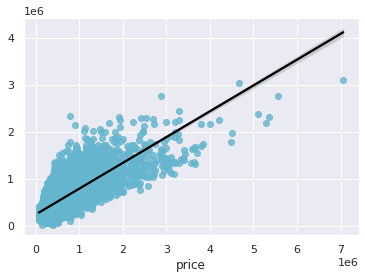

In [82]:
# Visualize Predictions vs Real data
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x=y, y=predictions, scatter_kws={"color": "c"}, line_kws={"color": "black"})

Write your conclusions.
What do yu see?

In [83]:
# Conclusions:
# How is is the house sale price affected by the features?
#R= Square feet/Size affects the most to the value of the property, following bathroom, then bedrooms and lastly the year it was built.

# for each unit increase in the number of bedrooms the house sale price ---------- 7.439e+04.

# for each unit increase in the number of bathrooms the house sale price ------------ 8.304e+04.

# for each squared feet more the house sale price increases by ------------  300.0128.

# What else do you see?
#R= We can perceive that the prices aren't increasing strictly as the prediciton says, but we can actually see an increase. Also, there is a relationship
#between the size of the property and the no. of bathrooms it has. 